# Air Quality Index

## ML model to be used

- Linear Regression
- Lasso Regression
- Ridge Regression
- Decision Tree Regressor*
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- ANN- Artificial Neural Network


## Decision Tree Regressor for training the data

In [23]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
#Reading the dataframe
data_frame=pd.read_csv('AQI_data.csv')

In [26]:
data_frame.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [27]:
x=data_frame.iloc[:,:-1]#independent features
y=data_frame.iloc[:,-1]#dependent feature

## Spliting the data

In [28]:
#spliting the data by dividing into 70% for training data and 30% for test data

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

- x_train and y_train are used for training the model.
- x_test and y_test are used for test the model.

In [30]:
#initializing the model

In [31]:
model=DecisionTreeRegressor()

In [32]:
#fitting the model with data

In [33]:
model.fit(x_train,y_train)

DecisionTreeRegressor()

In [34]:
#testing the data with test data
model.score(x_test,y_test)

0.6761281173555618

In [35]:
#testing the data with train data
model.score(x_train,y_train)

1.0

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
#cross validation for test data
score=cross_val_score(model,x_test,y_test,cv=5)
score.mean()

0.1525210169290921

In [38]:
#cross validation for train data
score=cross_val_score(model,x_train,y_train,cv=5)
score.mean()

0.601423712364049

## Evaluating the model

In [39]:
#chekcing the predictions

In [40]:
predictions=model.predict(x_test)

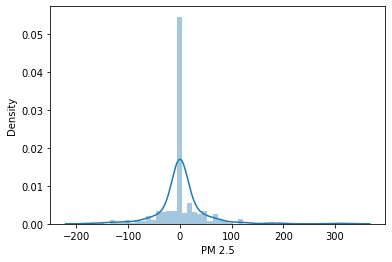

In [41]:
sns.distplot(predictions-y_test);

Text(0.5, 1.0, 'Relation between the y_test and predicted values')

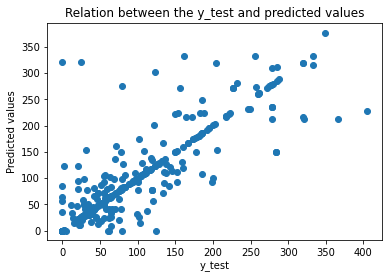

In [42]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test');
plt.ylabel('Predicted values');
plt.title('Relation between the y_test and predicted values')

## Evaluating the model using the most common evaluation metrics from scratch

- MAE:- Mean Absolute Error
- MSE:- Mean Squared Error
- RSME:- Root Mean Squared Error

In [78]:
#python module for metrics
from sklearn import metrics
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  31.3962366673592
MSE:  2228.9826262451024
RMSE:  47.21210253997488


## Hyperparameter tuning for DecisionTreeRegressor

**Using Grid search where the model the picks the given parameters in order and tune the model.**

In [57]:
from sklearn.model_selection import GridSearchCV

In [45]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree

Creating the paramgrid which contains parameter combinations of RandomForestRegressor and those params are sent into the random cv model to train RandomForestRegressor

In [55]:
param_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [58]:
tree_model=DecisionTreeRegressor()

In [66]:
#initialzing the RandomSearchCV model
grid_cv=GridSearchCV(estimator=tree_model,scoring='neg_mean_squared_error',param_grid=param_grid,n_jobs=100,cv=5,verbose=10)

In [67]:
grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Batch computation too fast (0.0393s.) Setting batch_size=2.
[Parallel(n_jobs=100)]: Done  21 tasks      | elapsed:    0.1s
[Parallel(n_jobs=100)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=100)]: Done  65 tasks      | elapsed:    0.2s
[Parallel(n_jobs=100)]: Done  88 tasks      | elapsed:    0.3s
[Parallel(n_jobs=100)]: Done 113 tasks      | elapsed:    0.3s
[Parallel(n_jobs=100)]: Done 138 tasks      | elapsed:    0.4s
[Parallel(n_jobs=100)]: Done 165 tasks      | elapsed:    0.4s
[Parallel(n_jobs=100)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=100)]: Done 218 out of 600 | elapsed:    0.5s remaining:    0.9s
[Parallel(n_jobs=100)]: Done 340 out of 600 | elapsed:    0.6s remaining:    0.5s
[Parallel(n_jobs=100)]: Done 462 out of 600 | elapsed:    0.6s remaining:    0.2s
[Parallel(n_jobs=100)]: Done 584 out of 600 | elapsed:    0.6s remaining:    0.0s
[Para

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=100,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 15, 100]},
             scoring='neg_mean_squared_error', verbose=10)

In [69]:
#getting best params
grid_cv.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 15}

In [70]:
#getting best score
grid_cv.best_score_

-2502.951155053559

[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, score=-2965.374, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=100 .........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=100, score=-3123.913, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=100 ........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=100, score=-3001.981, total=   0.0s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=10 ..........
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=10, score=-3656.162, total=   0.0s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=2, score=-2911.655, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=100 ..........
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=100, score=-2763.975, total=   0.0s
[CV] max_depth=

[CV] max_depth=5, min_samples_leaf=10, min_samples_split=5 ...........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=5, score=-2433.956, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=10, score=-2750.958, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=2 ...........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=2, score=-2750.958, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=10 ...........
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=10, score=-2848.487, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=10 ..........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=10, score=-2289.872, total=   0.1s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=2 ...........
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=2, score=-2326.238, total=   0.0s
[CV] max_depth=10, m

[CV] max_depth=5, min_samples_leaf=5, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=2, score=-3128.747, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=5 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=5, score=-2998.687, total=   0.0s
[CV] max_depth=20, min_samples_leaf=10, min_samples_split=100 ........
[CV]  max_depth=20, min_samples_leaf=10, min_samples_split=100, score=-2727.484, total=   0.0s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=2 ...........
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=2, score=-2062.309, total=   0.0s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=5 ...........
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=5, score=-2740.247, total=   0.0s
[CV] max_depth=5, min_samples_leaf=5, min_samples_split=10 ...........
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=10, score=-2489.706, total=   0.1s
[CV] max_depth=15, m

[CV] max_depth=5, min_samples_leaf=2, min_samples_split=15 ...........
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=15, score=-2752.048, total=   0.1s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10 ..........
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, score=-2501.996, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=15 .........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=15, score=-2478.646, total=   0.0s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2 ...........
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, score=-2538.549, total=   0.0s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=15 ..........
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=15, score=-2502.790, total=   0.0s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=100 .........
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=100, score=-3123.913, total=   0.0s
[CV] max_depth=2

[CV] max_depth=5, min_samples_leaf=2, min_samples_split=100 ..........
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=100, score=-2529.741, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=15 ..........
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=15, score=-2442.456, total=   0.0s
[CV] max_depth=25, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=25, min_samples_leaf=10, min_samples_split=10, score=-2815.098, total=   0.0s
[CV] max_depth=25, min_samples_leaf=10, min_samples_split=15 .........
[CV]  max_depth=25, min_samples_leaf=10, min_samples_split=15, score=-2478.646, total=   0.0s
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=2 ...........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=2, score=-2742.083, total=   0.0s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=15 ..........
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=15, score=-2040.355, total=   0.0s
[CV] max_depth=

[CV] max_depth=5, min_samples_leaf=2, min_samples_split=100 ..........
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=100, score=-2922.402, total=   0.1s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=100 .........
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=100, score=-3344.126, total=   0.0s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=5 ...........
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=5, score=-2478.999, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=15 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=15, score=-2739.237, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=2 ...........
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=2, score=-2531.763, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5 ...........
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, score=-2442.652, total=   0.0s
[CV] max_depth=15, 

[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, score=-3664.642, total=   0.1s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=15 .........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=15, score=-2664.608, total=   0.1s
[CV] max_depth=25, min_samples_leaf=1, min_samples_split=5 ...........
[CV]  max_depth=25, min_samples_leaf=1, min_samples_split=5, score=-2597.934, total=   0.0s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=5 ...........
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=5, score=-2790.698, total=   0.0s
[CV] max_depth=25, min_samples_leaf=5, min_samples_split=10 ..........
[CV]  max_depth=25, min_samples_leaf=5, min_samples_split=10, score=-2502.342, total=   0.0s
[CV] max_depth=25, min_samples_leaf=5, min_samples_split=15 ..........
[CV]  max_depth=25, min_samples_leaf=5, min_samples_split=15, score=-2801.765, total=   0.0s
[CV] max_depth=30, 

[CV] max_depth=5, min_samples_leaf=1, min_samples_split=15 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=15, score=-3251.124, total=   0.1s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=5 ...........
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=5, score=-2744.840, total=   0.0s
[CV] max_depth=25, min_samples_leaf=2, min_samples_split=10 ..........
[CV]  max_depth=25, min_samples_leaf=2, min_samples_split=10, score=-2335.804, total=   0.0s
[CV] max_depth=25, min_samples_leaf=5, min_samples_split=100 .........
[CV]  max_depth=25, min_samples_leaf=5, min_samples_split=100, score=-2774.984, total=   0.0s
[CV] max_depth=25, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=25, min_samples_leaf=10, min_samples_split=10, score=-2622.616, total=   0.0s
[CV] max_depth=30, min_samples_leaf=5, min_samples_split=5 ...........
[CV]  max_depth=30, min_samples_leaf=5, min_samples_split=5, score=-2510.385, total=   0.0s
[CV] max_depth=30

[CV] max_depth=5, min_samples_leaf=1, min_samples_split=15 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=15, score=-2662.824, total=   0.1s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=5 ...........
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=5, score=-2531.763, total=   0.0s
[CV] max_depth=30, min_samples_leaf=5, min_samples_split=2 ...........
[CV]  max_depth=30, min_samples_leaf=5, min_samples_split=2, score=-2531.763, total=   0.0s
[CV] max_depth=30, min_samples_leaf=5, min_samples_split=5 ...........
[CV]  max_depth=30, min_samples_leaf=5, min_samples_split=5, score=-2568.225, total=   0.0s
[CV] max_depth=30, min_samples_leaf=5, min_samples_split=10 ..........
[CV]  max_depth=30, min_samples_leaf=5, min_samples_split=10, score=-2531.763, total=   0.0s
[CV] max_depth=30, min_samples_leaf=5, min_samples_split=100 .........
[CV]  max_depth=30, min_samples_leaf=5, min_samples_split=100, score=-2929.476, total=   0.0s
[CV] max_depth=30, 

[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, score=-2432.601, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5 ...........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, score=-2674.926, total=   0.1s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=2 ...........
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=2, score=-3488.536, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, score=-2664.608, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=100 ........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=100, score=-2544.860, total=   0.0s
[CV] max_depth=15, min_samples_leaf=2, min_samples_split=10 ..........
[CV]  max_depth=15, min_samples_leaf=2, min_samples_split=10, score=-3601.323, total=   0.0s
[CV] max_depth=15

[CV] max_depth=5, min_samples_leaf=1, min_samples_split=10 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=10, score=-2739.237, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=2, score=-3486.306, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=15 ..........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=15, score=-2593.857, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=10 ..........
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=10, score=-2588.058, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15 ..........
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, score=-2527.546, total=   0.0s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=100 .........
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=100, score=-3344.126, total=   0.0s
[CV] max_depth=10

[CV] max_depth=5, min_samples_leaf=5, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=2, score=-2720.354, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=10 ..........
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=10, score=-3212.337, total=   0.0s
[CV] max_depth=15, min_samples_leaf=5, min_samples_split=100 .........
[CV]  max_depth=15, min_samples_leaf=5, min_samples_split=100, score=-2929.476, total=   0.0s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=2 ...........
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=2, score=-2631.225, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, score=-2740.855, total=   0.0s
[CV] max_depth=5, min_samples_leaf=2, min_samples_split=5 ............
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=5, score=-2531.435, total=   0.0s
[CV] max_depth=5, min_

[CV] max_depth=5, min_samples_leaf=1, min_samples_split=15 ...........
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=15, score=-2262.656, total=   0.0s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=5 ...........
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=5, score=-3514.534, total=   0.0s
[CV] max_depth=15, min_samples_leaf=1, min_samples_split=100 .........
[CV]  max_depth=15, min_samples_leaf=1, min_samples_split=100, score=-2543.404, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=100 ........
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=100, score=-2984.568, total=   0.0s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=5 ...........
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=5, score=-2673.575, total=   0.0s
[CV] max_depth=30, min_samples_leaf=2, min_samples_split=5 ...........
[CV]  max_depth=30, min_samples_leaf=2, min_samples_split=5, score=-2920.622, total=   0.0s
[CV] max_depth=30

[CV] max_depth=5, min_samples_leaf=5, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=5, min_samples_split=2, score=-2616.980, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=5 ..........
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=5, score=-2370.273, total=   0.0s
[CV] max_depth=25, min_samples_leaf=5, min_samples_split=5 ...........
[CV]  max_depth=25, min_samples_leaf=5, min_samples_split=5, score=-2510.385, total=   0.0s
[CV] max_depth=30, min_samples_leaf=10, min_samples_split=100 ........
[CV]  max_depth=30, min_samples_leaf=10, min_samples_split=100, score=-2544.860, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, score=-3664.642, total=   0.0s
[CV] max_depth=5, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=1, min_samples_split=2, score=-2736.508, total=   0.0s
[CV] max_depth=5, min

[CV] max_depth=5, min_samples_leaf=2, min_samples_split=2 ............
[CV]  max_depth=5, min_samples_leaf=2, min_samples_split=2, score=-2321.885, total=   0.1s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=5 ...........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=5, score=-2437.185, total=   0.0s
[CV] max_depth=10, min_samples_leaf=2, min_samples_split=100 .........
[CV]  max_depth=10, min_samples_leaf=2, min_samples_split=100, score=-2543.404, total=   0.1s
[CV] max_depth=10, min_samples_leaf=5, min_samples_split=15 ..........
[CV]  max_depth=10, min_samples_leaf=5, min_samples_split=15, score=-3100.265, total=   0.0s
[CV] max_depth=10, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=10, min_samples_leaf=10, min_samples_split=10, score=-2344.159, total=   0.0s
[CV] max_depth=15, min_samples_leaf=10, min_samples_split=10 .........
[CV]  max_depth=15, min_samples_leaf=10, min_samples_split=10, score=-2815.098, total=   0.0s
[CV] max_depth=1

[CV] max_depth=5, min_samples_leaf=10, min_samples_split=10 ..........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=10, score=-2775.948, total=   0.0s
[CV] max_depth=20, min_samples_leaf=1, min_samples_split=100 .........
[CV]  max_depth=20, min_samples_leaf=1, min_samples_split=100, score=-3344.126, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=2 ...........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=2, score=-3691.657, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=100 .........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=100, score=-3123.913, total=   0.0s
[CV] max_depth=20, min_samples_leaf=2, min_samples_split=100 .........
[CV]  max_depth=20, min_samples_leaf=2, min_samples_split=100, score=-3344.126, total=   0.0s
[CV] max_depth=20, min_samples_leaf=5, min_samples_split=10 ..........
[CV]  max_depth=20, min_samples_leaf=5, min_samples_split=10, score=-2561.030, total=   0.0s
[CV] max_depth

In [73]:
#getting predicted values
predictions=grid_cv.predict(x_test)

In [74]:
#Evaluating model

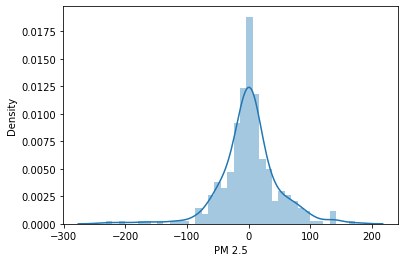

In [75]:
sns.distplot(y_test-predictions);

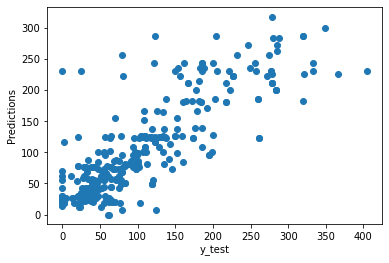

In [77]:
plt.scatter(y_test,predictions);
plt.xlabel('y_test');
plt.ylabel('Predictions');

In [79]:
print('MAE: ',metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  31.3962366673592
MSE:  2228.9826262451024
RMSE:  47.21210253997488
[CV] max_depth=5, min_samples_leaf=10, min_samples_split=100 .........
[CV]  max_depth=5, min_samples_leaf=10, min_samples_split=100, score=-3291.491, total=   0.0s
